In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from missingno import matrix
import missingno as msno

# Carga de datos

In [10]:
original = sns.load_dataset('penguins')
original.dropna(thresh=5, inplace=True)

In [11]:
df= pd.read_parquet('missing.parquet')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,NaN,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


<Figure size 1000x600 with 0 Axes>

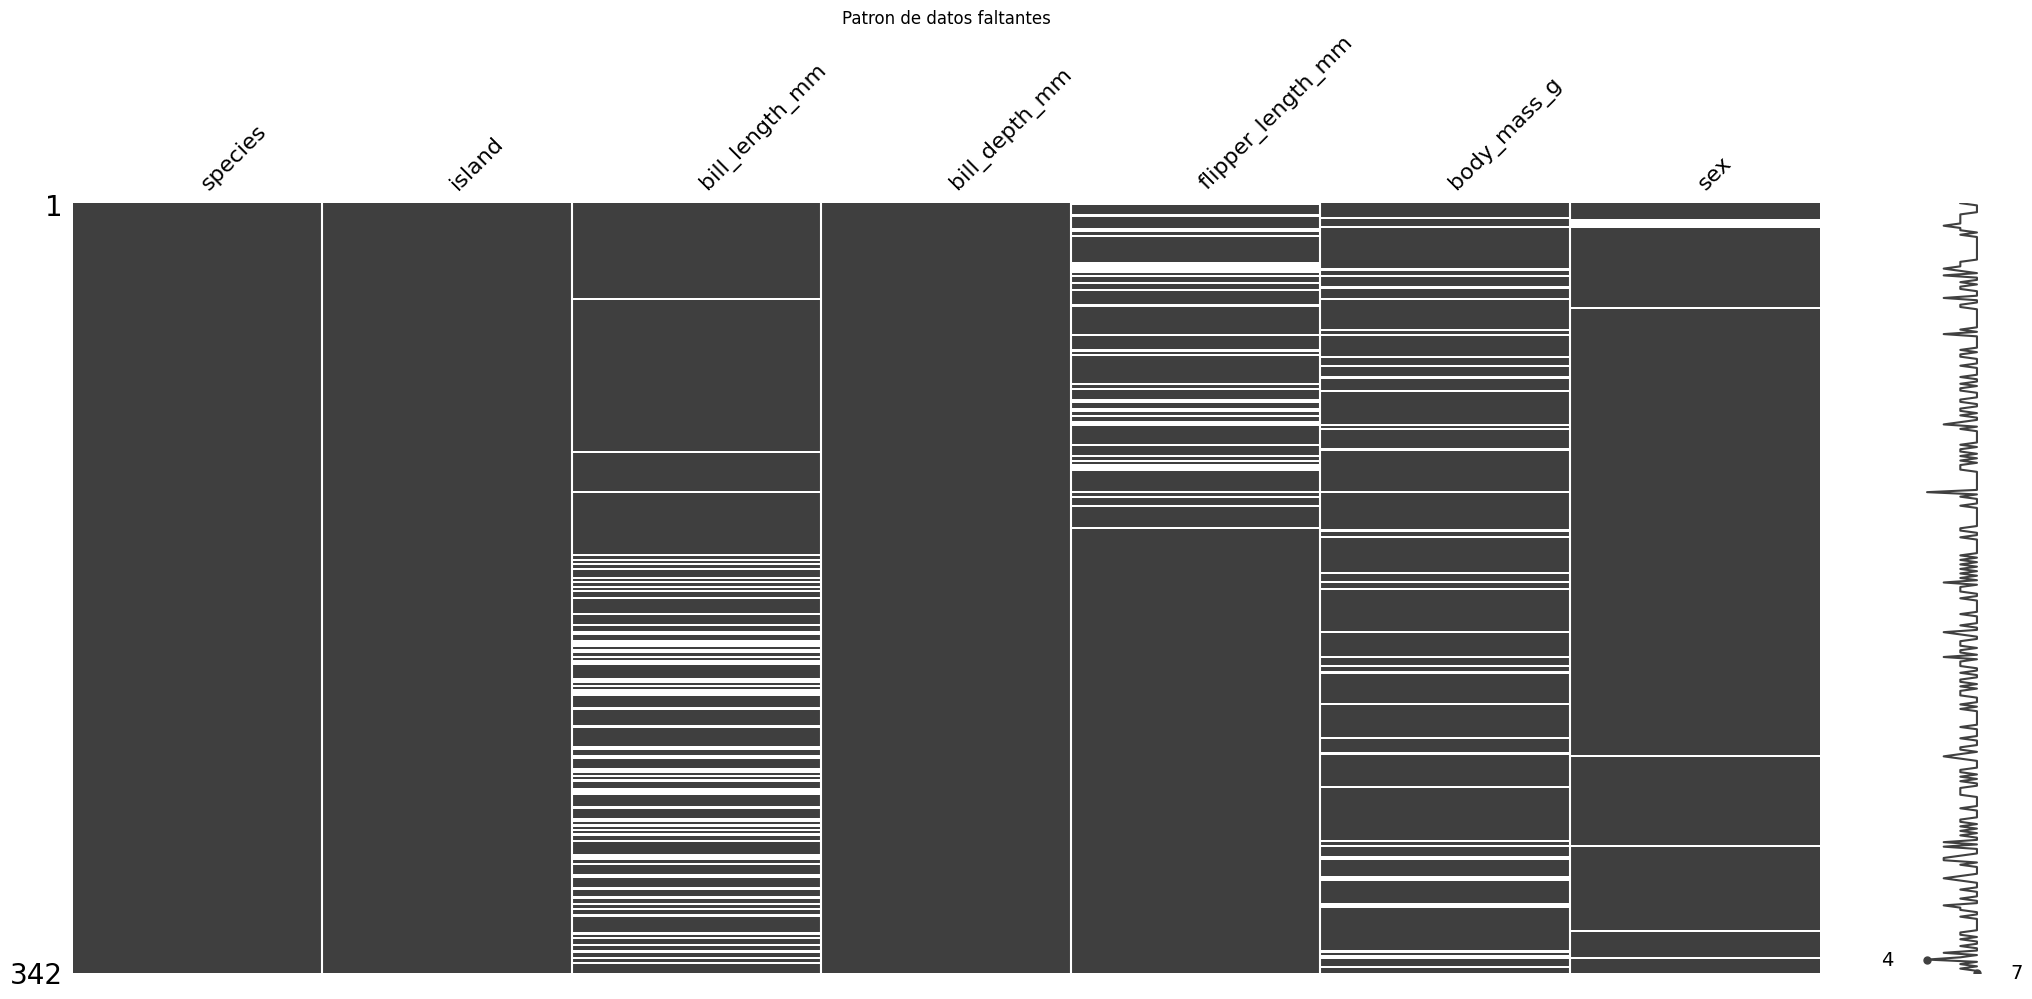

In [ ]:
plt.figure(figsize=(10,6))
msno.matrix(df)
plt.title('Patron de datos faltantes')
plt.show();

<Figure size 1000x600 with 0 Axes>

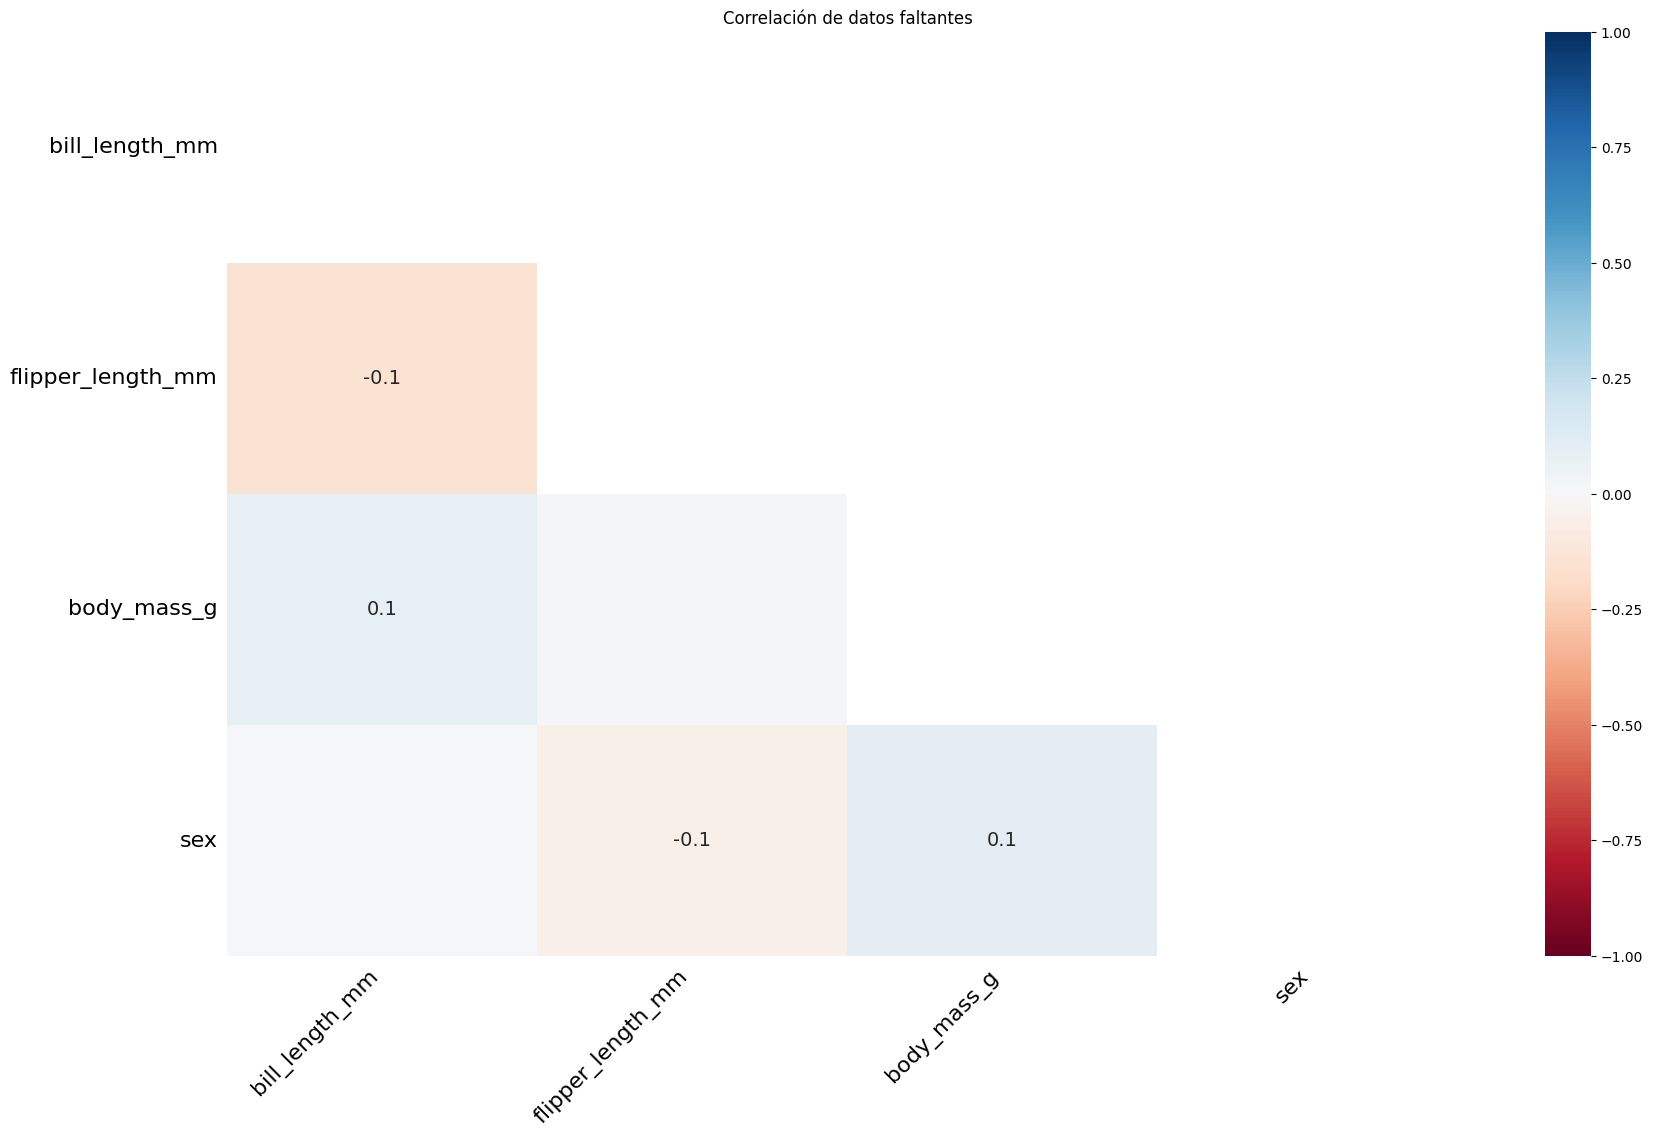

In [13]:
plt.figure(figsize=(10,6))
msno.heatmap(df)
plt.title('Correlación de datos faltantes')
plt.show();

## Columna ``body_mass_g``

In [15]:
# Análisis de datos faltantes
print('Análisis de body_mass_g')
#print('\nMedia con datos')
print('Media de datos con missing', original['body_mass_g'].mean())
print('Media con datos faltantes:',
      df['body_mass_g'].dropna().mean())
#np.nanmean(df['body_mass_g']) # Se puede hacer así también

Análisis de body_mass_g
Media de datos con missing 4201.754385964912
Media con datos faltantes: 4179.568106312292


## Columna ``flipper_length_mm`` MCAR (aleatorios)

In [ ]:
print(df.groupby('species')['flipper_length_mm'].apply(lambda x: x.isna().mean()*100))
# Esto hace la media de nulos por cada especie (solo tiene nulos adeline)
# Hacer agrupacion por categoría para comparar 

species
Adelie       23.84106
Chinstrap     0.00000
Gentoo        0.00000
Name: flipper_length_mm, dtype: float64


## Columna ``bill_length_mm`` MNAR (No aleatorios)

In [ ]:
print(original['bill_length_mm'].mean())
print('Media de bill_lenght_mm con datos faltantes',
      df['bill_length_mm'].mean())

# Dado que la media es más baja podemos asumir que hemos quitado picos grandes (si fuese más alta es porque se quitaron los picos más pequeños)

43.9219298245614
Media de bill_lenght_mm con datos faltantes 42.80072727272727
